In [397]:
import numpy as np
import pylab as plt
import scipy.stats

In [398]:
def resample_uniform(bounds):
    """This function samples from the bounded region, with typical-set stabilization."""
    N = len(bounds)
    ulo, uhi = bounds.T
    ulo = np.clip(ulo, 0., 1.)
    uhi = np.clip(uhi, 0., 1.)
    width = uhi-ulo
    u_BS = ulo + np.random.rand(N)*width  # bounded samples
    idx_BS = np.argsort(np.argsort(u_BS))
    u_free = np.random.rand(N)  # unb}ounded samples
    u_free_sorted = np.sort(u_free)  # sorted unbounded samples
    u = u_free_sorted[idx_BS]
    return u

def resample(dist, bounds):
    u_bounds = dist.cdf(bounds)
    u = resample_uniform(u_bounds)
    return dist.ppf(u)

def resample_norm(bounds):
    dist = scipy.stats.norm(0, 1)
    return resample(dist, bounds)

In [399]:
def rrfft(a):
    n = len(a)
    c = np.empty(n)
    b = np.fft.rfft(a, norm = 'ortho')
    if n%2 == 0:
        b_real, b_imag = np.real(b), np.imag(b)[1:-1]
        b_real[1:-1] *= 2**0.5
        b_imag *= 2**0.5
    else:
        b_real, b_imag = np.real(b), np.imag(b)[1:]
        b_real[1:] *= 2**0.5
        b_imag *= 2**0.5
    c[0], c[1::2], c[2::2] = b_real[0], b_real[1:], b_imag
    return c

def rirfft(a):
    n = len(a)
    if n%2 == 0:
        b = np.zeros(int(n/2)+1, dtype = np.complex128)
        b[0] += a[0]
        b[1:] += a[1::2]/2**0.5
        b[1:-1] += a[2::2]*1j/2**0.5
    else:
        b = np.zeros(int(n/2)+1, dtype = np.complex128)
        b[0] += a[0]
        b[1:] += a[1::2]/2**0.5
        b[1:] += a[2::2]*1j/2**0.5
    c = np.fft.irfft(b, n, norm = 'ortho')
    return c

In [400]:
summary = lambda x: x.mean()
summary = lambda x: x[:500].mean() - x[500:].mean()
z = np.random.randn(1000)
z0 = rirfft(z)

In [401]:
delta = 10.01
bounds = np.stack([z-delta, z+delta]).T
#bounds[:50, :] = [-.01, .01]

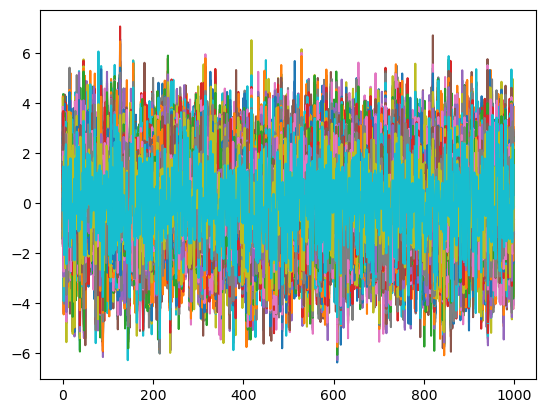

In [402]:
s = []
for _ in range(1000):
    x = resample_norm(bounds)
    #x[5] *= 100
    x = rirfft(x)
    s.append(summary(x))
    plt.plot(x-z0)

0.06439535265132189


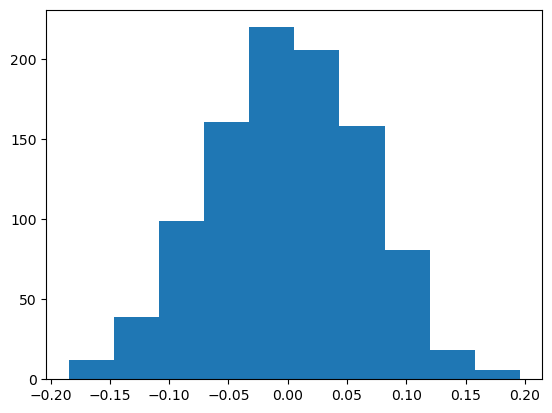

In [403]:
plt.hist(s);
print(np.var(s)**0.5)